# DATA ANALYSIS OF NIGERIA

This notebook analyzes the data found in moja global datasets for Nigeria and one of its state Lagos.

## Initialising libabries

In [1]:
import geopandas as gpd
import io, requests
import matplotlib.pyplot as plt

# 1. FUNCTIONCS USED

In [2]:
def get_df(link):    
    """
    Inputs a link to a json/geojson file 
    and returns the dataframe
    """
    try:
        return gpd.read_file(link)
    except Exception as e:
        print(e)
        print("Retrieving the Dataframe from url.")
        req = requests.get(link).content
        return gpd.read_file(io.StringIO(req.decode('utf-8')))


def plot_boundary(df, ax, color='none', edgecolor='black'):
    """
    Plots the administrative boundaries
    """
    df.plot(ax=ax, color=color, edgecolor=edgecolor)

    
def plot_feature(df, ax, column, edgecolor='black', cmap='tab20'):
    """
    Plots the features
    """
    df.plot(ax=ax, column=column, edgecolor=edgecolor, cmap=cmap, legend=True)
    
    
def clip_df(df_complete, df_n):
    """
    Clips the dataset to retain only the necessary data
    """
    return df_complete.clip(df_n)


def column_std(df):
    """
    Standardises column names
    """
    return df.columns.str.lower()

# 2. ADMINISTRATIVE BOUNDARIES

In [3]:
#Administrative Boundaries of Nigeria and Niger
nga_bound = 'file:///home/SwizzCoder/Outreachy_SwizzCoder_2023/NGA_AL2_Nigeria.json'
nga_bound_all= 'file:///home/SwizzCoder/Outreachy_SwizzCoder_2023/NGA_ALL_states.json'
la_bound = 'file:///home/SwizzCoder/Outreachy_SwizzCoder_2023/NGA_AL4_Lagos.json'

In [4]:
#Dataframes of Adminitrative Boundaries files
nga_boundary = get_df(nga_bound)
nga_all = get_df(nga_bound_all)
la_boundary = get_df(la_bound)

In [5]:
print(type(nga_boundary))
display(nga_boundary)

<class 'geopandas.geodataframe.GeoDataFrame'>


,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,NGA,,Nigeria,Nigeria,Nigeria,,administrative,2,Q1033,en:Nigeria,2019-09-18 23:02:02,"MULTIPOLYGON (((6.44714 4.30935, 6.44678 4.309..."


Nigeria is a country made up of 36 states which have been plotted as seen below.

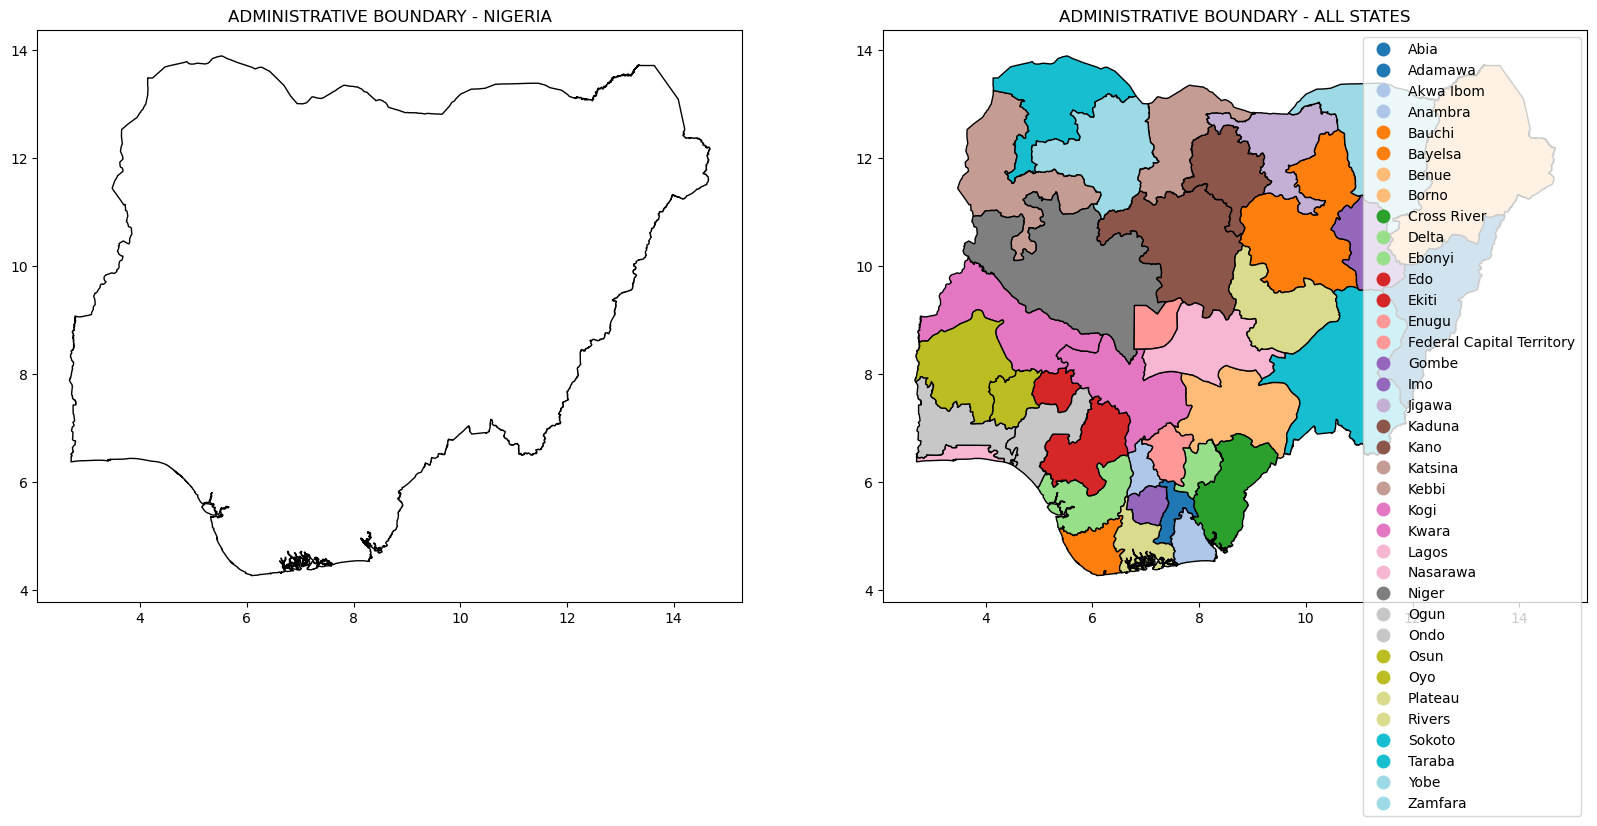

In [6]:
#Plotting the boundaries
nga_boundary  = nga_boundary[['name', 'geometry']]
nga_all = nga_all[['name', 'geometry']]
la_boundary = la_boundary[['name', 'geometry']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('ADMINISTRATIVE BOUNDARY - NIGERIA')
ax2.set_title('ADMINISTRATIVE BOUNDARY - ALL STATES')
plot_boundary(nga_boundary, ax1)
plot_feature(nga_all, ax2, 'name')

plt.show()

This analysis also has Lagos as a point of focus.

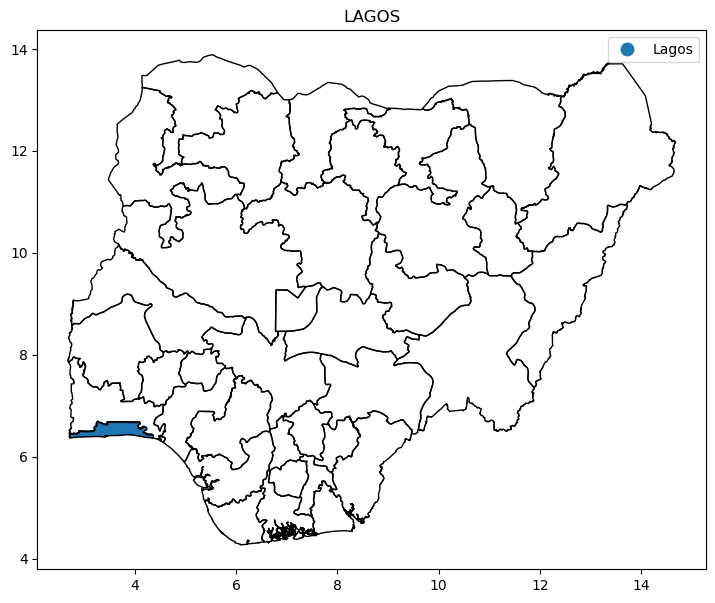

In [7]:
#Identifying Lagos on the map of Nigeria
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.set_title('LAGOS')
plot_boundary(nga_all, ax)
plot_feature(la_boundary, ax, 'name')

plt.show()

# 3. BIODIVERSITY HOTSPOTS

In [8]:
#Biodiversity Hotspots of the world
bio_hotspot = 'file:///home/SwizzCoder/Outreachy_SwizzCoder_2023/CI_BiodiversityHotspots.geojson'
bio_hotspot_df = get_df(bio_hotspot)

In [9]:
print(type(bio_hotspot_df))
display(bio_hotspot_df.head(100))

<class 'geopandas.geodataframe.GeoDataFrame'>


,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -..."
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -..."
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161..."
5,6,New Caledonia,outer limit,57.304717,38.222164,"POLYGON ((164.35824 -19.10137, 164.32053 -19.0..."
6,7,Southwest Australia,hotspot area,60.859672,33.934367,"MULTIPOLYGON (((117.88123 -35.17920, 117.87544..."
7,8,Succulent Karoo,hotspot area,79.117896,9.648439,"MULTIPOLYGON (((19.94758 -33.85045, 19.94773 -..."
8,9,Forests of East Australia,hotspot area,88.128992,23.473995,"MULTIPOLYGON (((153.49344 -27.42185, 153.48857..."
9,10,Caucasus,hotspot area,90.689909,58.514955,"MULTIPOLYGON (((53.64732 36.85539, 53.64686 36..."


In [10]:
#Standardising the column names
bio_hotspot_df.columns = column_std(bio_hotspot_df)

#Clipping the dataset to retain data about only Nigeria
nga_bio_df = clip_df(bio_hotspot_df, nga_boundary)
nga_bio_df = nga_bio_df[['name', 'geometry']]

#Clipping the dataset to retain data about only Lagos
la_bio_df = clip_df(nga_bio_df, la_boundary)

In [11]:
print("Nigeria has the following Biodiversity Hotspots: ")
print(nga_bio_df['name'])

print("\nLagos has the following Biodiversity Hotspots: ")
print(la_bio_df['name'])

Nigeria has the following Biodiversity Hotspots: 
40    Guinean Forests of West Africa
Name: name, dtype: object

Lagos has the following Biodiversity Hotspots: 
40    Guinean Forests of West Africa
Name: name, dtype: object


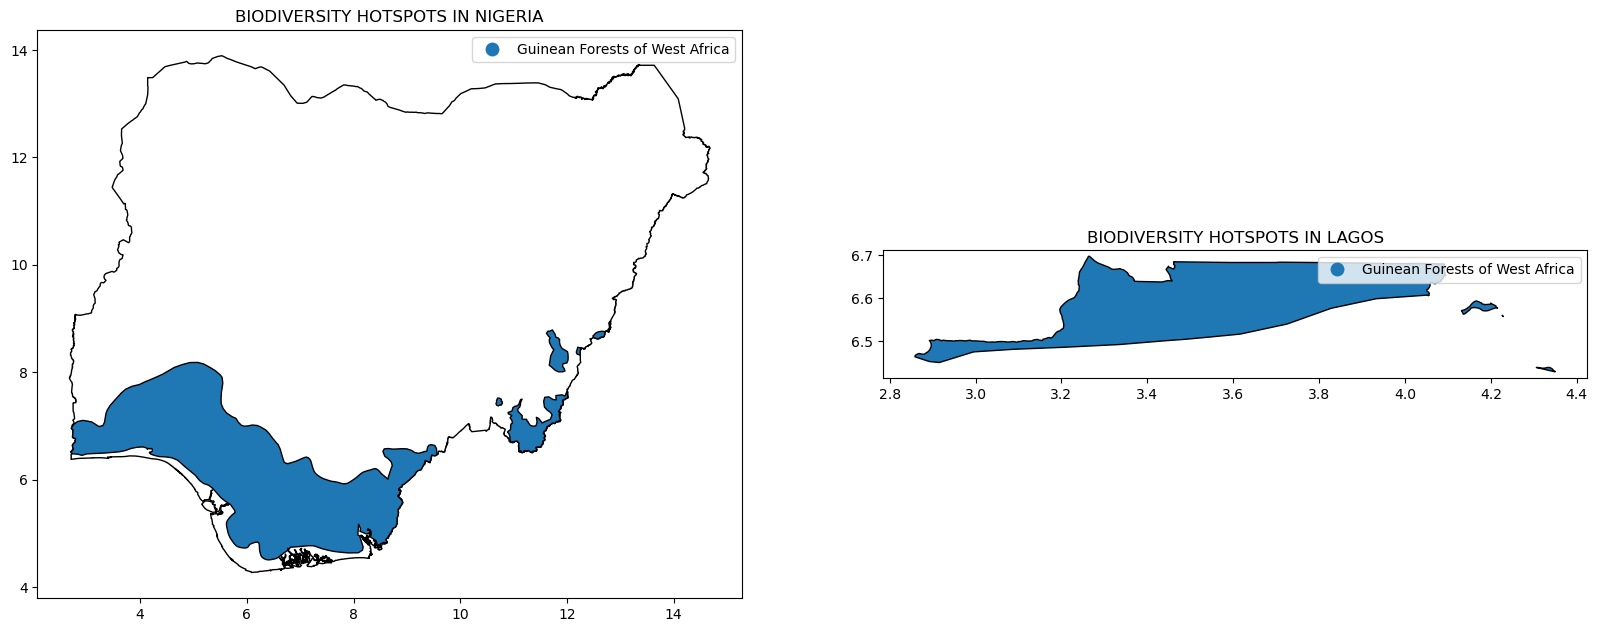

In [12]:
#Plotting the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('BIODIVERSITY HOTSPOTS IN NIGERIA')
ax2.set_title('BIODIVERSITY HOTSPOTS IN LAGOS')
plot_boundary(nga_boundary, ax1)
plot_feature(nga_bio_df, ax1, "name")
plot_feature(la_bio_df, ax2, "name")

plt.show()

# 4. FOREST COVER

In [13]:
nga_bound_gez = 'file:///home/SwizzCoder/Outreachy_SwizzCoder_2023/NGA_AL2_Nigeria_GEZ.json'
la_bound_gez = 'file:///home/SwizzCoder/Outreachy_SwizzCoder_2023/NGA_AL4_Lagos_GEZ.json'

In [14]:
nga_forest_df = get_df(nga_bound_gez)
la_forest_df = get_df(la_bound_gez)

In [15]:
print(nga_forest_df.head(100))

  country ISO3166_2     name                  gez_name  gez_code gez_abbrev  \
0     NGA            Nigeria       Tropical dry forest        13       TAwb   
1     NGA            Nigeria     Tropical moist forest        12       TAwa   
2     NGA            Nigeria  Tropical mountain system        16         TM   
3     NGA            Nigeria       Tropical rainforest        11        TAr   
4     NGA            Nigeria        Tropical shrubland        14       TBSh   
5     NGA            Nigeria                     Water        90      Water   

   adminlevel                                           geometry  
0           2  POLYGON ((4.17387 12.70964, 3.91224 12.72630, ...  
1           2  POLYGON ((6.12077 12.05414, 6.01167 12.05684, ...  
2           2  MULTIPOLYGON (((12.00401 7.51347, 12.00703 7.5...  
3           2  MULTIPOLYGON (((6.72261 4.40102, 6.72370 4.401...  
4           2  POLYGON ((5.83178 13.76125, 5.78032 13.78030, ...  
5           2  POLYGON ((14.19098 12.59410, 

In [16]:
#Standardising columns
nga_forest_df.columns = column_std(nga_forest_df)
nga_forest_df = nga_forest_df[['gez_name', 'geometry']]

la_forest_df.columns = column_std(la_forest_df)
la_forest_df = la_forest_df[['gez_name', 'geometry']]

In [17]:
print("Nigeria has the following forests: ")
print(nga_forest_df['gez_name'])

print("\nLagos has the following forests: ")
print(la_forest_df['gez_name'])

Nigeria has the following forests: 
0         Tropical dry forest
1       Tropical moist forest
2    Tropical mountain system
3         Tropical rainforest
4          Tropical shrubland
5                       Water
Name: gez_name, dtype: object

Lagos has the following forests: 
0    Tropical rainforest
Name: gez_name, dtype: object


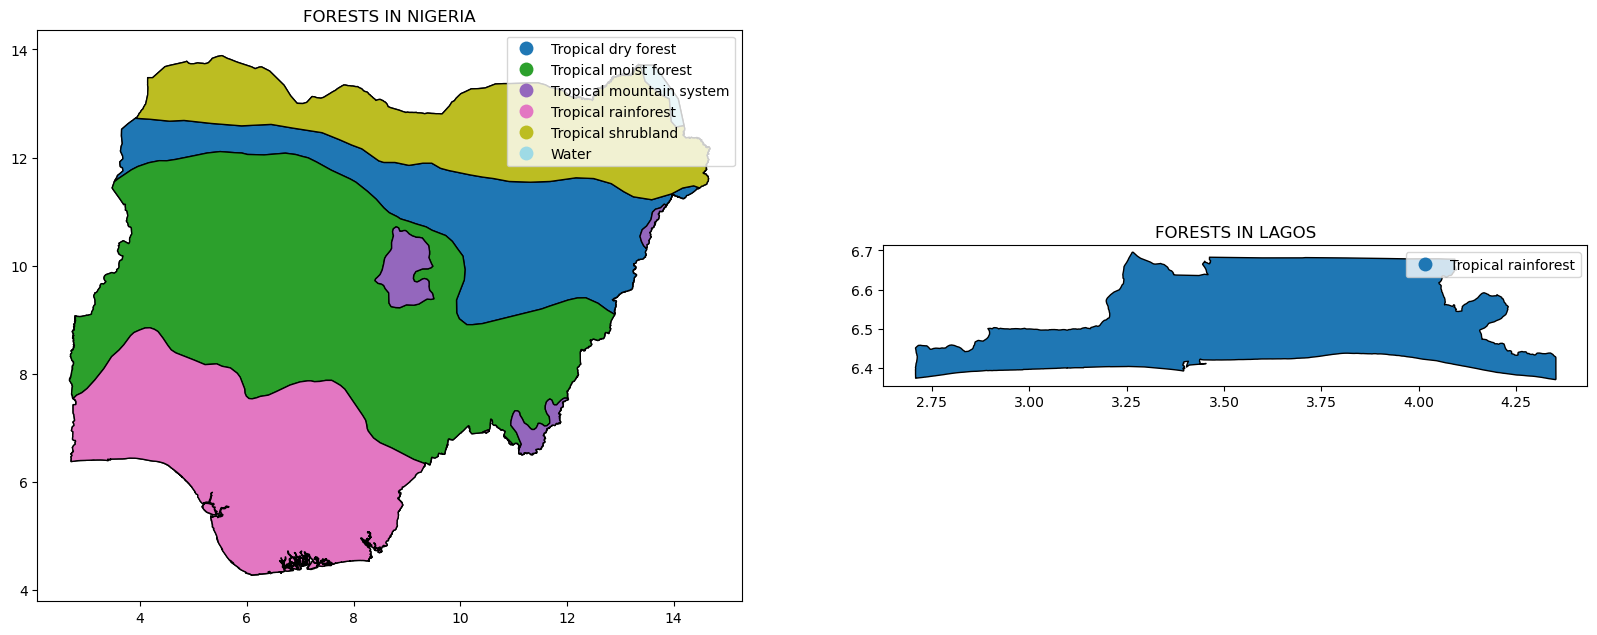

In [18]:
#Plotting the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('FORESTS IN NIGERIA')
ax2.set_title('FORESTS IN LAGOS')
plot_boundary(nga_boundary, ax1)
plot_feature(nga_forest_df, ax1, "gez_name")
plot_feature(la_forest_df, ax2, "gez_name")

plt.show()

# 5. SOIL COVER

In [19]:
nga_bound_wsr = 'file:///home/SwizzCoder/Outreachy_SwizzCoder_2023/NGA_AL2_Nigeria_WSR.json'
la_bound_wsr = 'file:///home/SwizzCoder/Outreachy_SwizzCoder_2023/NGA_AL4_Lagos_WSR.json'

In [20]:
nga_soil_df = get_df(nga_bound_wsr)
la_soil_df = get_df(la_bound_wsr)

display(nga_soil_df.head(100))

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,NGA,,Nigeria,AC,23,Acrisol,2,"MULTIPOLYGON (((11.51913 6.61454, 11.51960 6.6..."
1,NGA,,Nigeria,AR,3,Arenosol,2,"POLYGON ((5.83178 13.76125, 5.78032 13.78030, ..."
2,NGA,,Nigeria,FL,20,Fluvisol,2,"MULTIPOLYGON (((6.44714 4.30935, 6.44678 4.309..."
3,NGA,,Nigeria,GL,7,Gleysol,2,"MULTIPOLYGON (((13.93739 12.53061, 13.88475 12..."
4,NGA,,Nigeria,LX,6,Lixisol,2,"POLYGON ((7.17539 11.91021, 7.11702 12.00231, ..."
5,NGA,,Nigeria,VR,5,Vertisol,2,"POLYGON ((12.95992 9.43936, 12.95996 9.43937, ..."
6,NGA,,Nigeria,WAT,99,Waterbodies,2,"POLYGON ((14.19609 12.57082, 14.16116 12.72999..."


In [21]:
#Standardising columns
nga_soil_df.columns = column_std(nga_soil_df)
nga_soil_df = nga_soil_df[['ipcc', 'geometry']]

la_soil_df.columns = column_std(la_soil_df)
la_soil_df = la_soil_df[['ipcc', 'geometry']]

In [22]:
print("Soils found in NIGERIA: ")
print(nga_soil_df['ipcc'])

print("\nSoils found in LAGOS: ")
print(la_soil_df['ipcc'])

Soils found in NIGERIA: 
0        Acrisol
1       Arenosol
2       Fluvisol
3        Gleysol
4        Lixisol
5       Vertisol
6    Waterbodies
Name: ipcc, dtype: object

Soils found in LAGOS: 
0    Acrisol
Name: ipcc, dtype: object


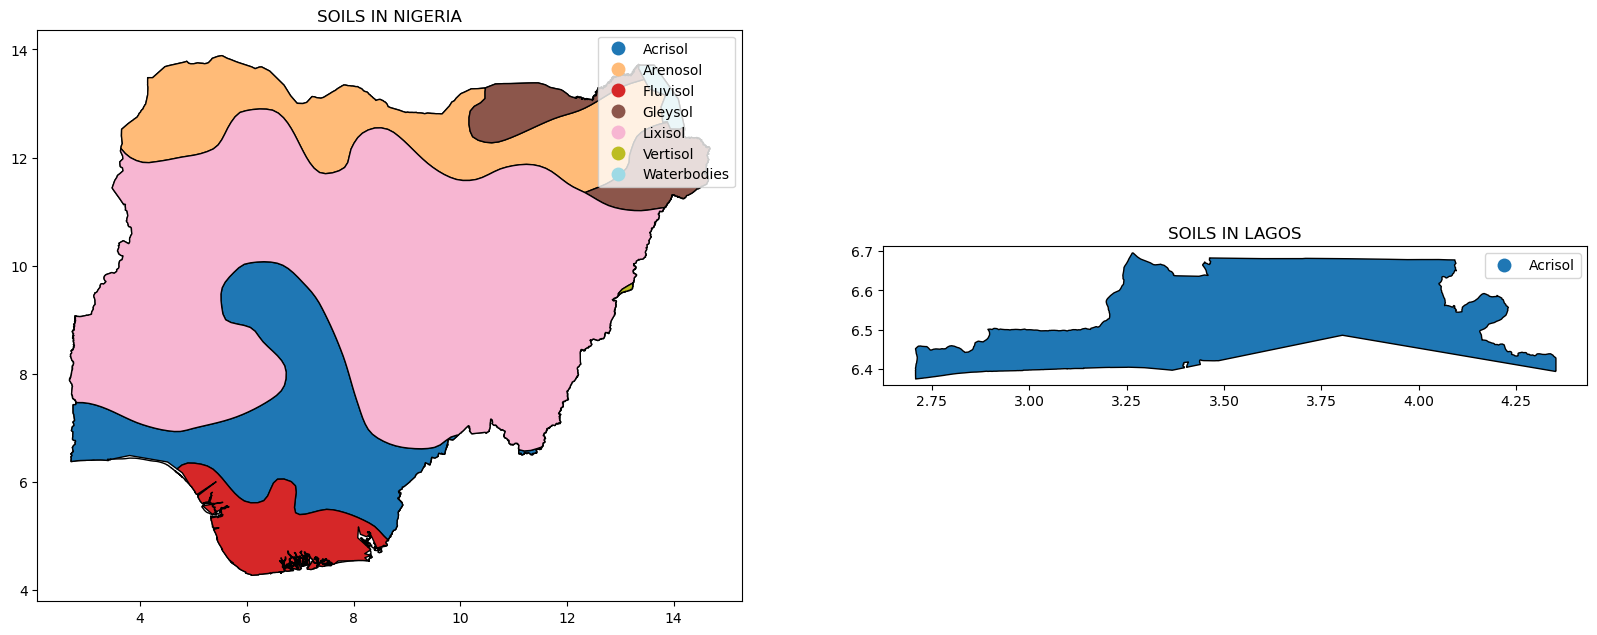

In [23]:
#Plotting the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('SOILS IN NIGERIA')
ax2.set_title('SOILS IN LAGOS')
plot_boundary(nga_boundary, ax1)
plot_feature(nga_soil_df, ax1, "ipcc")
plot_feature(la_soil_df, ax2, "ipcc")

plt.show()

# 6. AGRO-ECOLOGICAL ZONES

In [25]:
#Agro-Ecological Zones
agroeco_zones = 'file:///home/SwizzCoder/Outreachy_SwizzCoder_2023/GlobalAgroEcologicalZones_GAEZ.geojson'

In [26]:
agroeco_df = get_df(agroeco_zones)
agroeco_df.head(5)

,Value,geometry
0,1,"POLYGON ((-33.50000 83.65000, -33.50000 83.500..."
1,1,"POLYGON ((-37.85000 83.60000, -37.85000 83.500..."
2,1,"POLYGON ((-32.35000 83.60000, -32.35000 83.500..."
3,1,"POLYGON ((-31.25000 83.60000, -31.25000 83.500..."
4,1,"POLYGON ((-34.25000 83.60000, -34.25000 83.500..."


In [27]:
# Replacing the data that was in codes
classification = {'1': 'Steep terrain', '2': 'Artic/Cold', '3': 'Desert/Arid', 
          '4': 'Irrigated Soils', '5': 'Hydromorphic soils', 
          '6': 'Dry, good soils', '7': 'Dry, moderate soils', '8': 'Dry, poor soils', 
          '9': 'Moist, good soils', '10': 'Moist, moderate soils', 
          '11': 'Moist, poor soils', '12': 'Sub-humid, good soils', 
          '13': 'Sub-humid, moderate soils', '14': 'Sub-humid, poor soils', 
          '15': 'Humid, good soils', '16': 'Humid, moderate soils', 
          '17': 'Humid, poor soils', '18': 'Water'}


#Standardising column names
agroeco_df.columns = column_std(agroeco_df)

#Renaming value
agroeco_df.value = agroeco_df.value.astype('str').replace(classification)